In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
drug_data_to_load = "data/mouse_drug_data.csv"
trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(drug_data_to_load)
clin_trial_df = pd.read_csv(trial_data_to_load)

# Combine the data into a single dataset
merged=mouse_drug_df.merge(clin_trial_df)

# Display the data table for preview
merged


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timep_groupby=merged.groupby(["Drug", "Timepoint"])
tum_vol_mean=drug_timep_groupby['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tum_vol_mean_df=pd.DataFrame(tum_vol_mean)

#tum_vol_mean_df.index
#reveals that groupby turns our drug and timepoint into indexes.
#We need to change this by reset index
tum_vol_mean_df=tum_vol_mean_df.reset_index()

# Preview DataFrame
#tum_vol_mean_df.columns are index are now columns
tum_vol_mean_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
'''Using sem() from pd'''
stan_err=drug_timep_groupby['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
stan_err_df=pd.DataFrame(stan_err)
stan_err_df=stan_err_df.reset_index()
# Preview DataFrame
stan_err_df=stan_err_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Error'})
stan_err_df

,Drug,Timepoint,Tumor Volume Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
#reformat 
stan_err_df_pivot=stan_err_df.pivot(index='Timepoint',values='Tumor Volume Error', columns='Drug')
stan_err_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [5]:
# Minor Data Munging to Re-Format the Data Frames
'''use pivot (index='timepoint')'''
#this should describe total volume of tumor over time as drug works
drug_tumor_volume=tum_vol_mean_df.pivot(index='Timepoint',values='Tumor Volume (mm3)', columns='Drug')

# Preview that Reformatting worked
drug_tumor_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


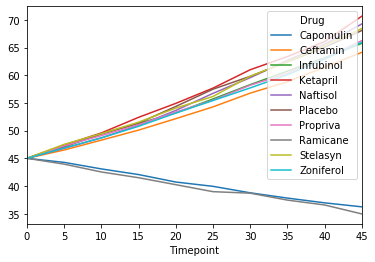

In [6]:
#seeing how the graph looks
drug_tumor_volume_plot=drug_tumor_volume.reset_index()
drug_tumor_volume_plot.plot(x='Timepoint')

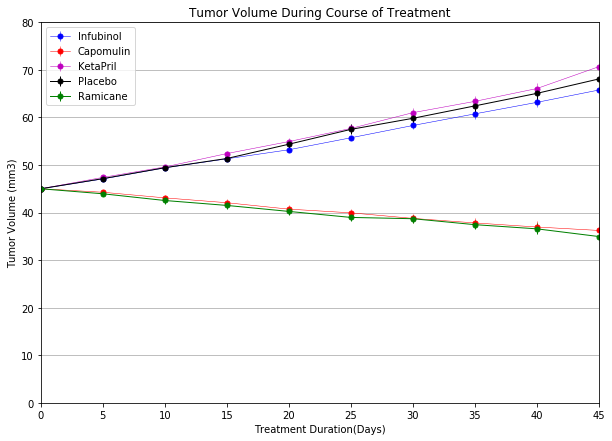

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate the Plot (with Error Bars)
fig= plt.figure(figsize=(10,7))

plt.errorbar(drug_tumor_volume.index, drug_tumor_volume['Infubinol'],yerr=stan_err_df_pivot['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='-', linewidth=0.5,label='Infubinol')

plt.errorbar(drug_tumor_volume.index, drug_tumor_volume['Capomulin'],yerr=stan_err_df_pivot['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='-', linewidth=0.5,label='Capomulin')

plt.errorbar(drug_tumor_volume.index, drug_tumor_volume['Ketapril'],yerr=stan_err_df_pivot['Ketapril'],
             color='m', marker='o', markersize=5, linestyle='-', linewidth=0.5,label='KetaPril')

plt.errorbar(drug_tumor_volume.index, drug_tumor_volume['Placebo'],yerr=stan_err_df_pivot['Placebo'],
             color='k', marker='o', markersize=5, linestyle='-', linewidth=1,label='Placebo')

plt.errorbar(drug_tumor_volume.index, drug_tumor_volume['Ramicane'],yerr=stan_err_df_pivot['Ramicane'],
             color='g', marker='o', markersize=5, linestyle='-', linewidth=1,label='Ramicane')
# Chart title
plt.title("Tumor Volume During Course of Treatment")
# x label
plt.ylim(0,80)
plt.xlim(0,45)
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(b=True, axis='y', which='major')
plt.legend(loc='upper left')
plt.show()

# Save the Figure
# Save the Figure
plt.savefig("Tumor Volume During Course of Treatment")

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_mean=drug_timep_groupby['Metastatic Sites'].mean() 
# Convert to DataFrame
met_site_df=pd.DataFrame(met_site_mean)
met_site_df=met_site_df.reset_index()

#clean and timepoint of each drug into columns
met_site_df=met_site_df.pivot(index='Timepoint',values='Metastatic Sites', columns='Drug')
# Preview DataFrame
met_site_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_err=drug_timep_groupby['Metastatic Sites'].sem() 

# Convert to DataFrame
met_site_err_df=pd.DataFrame(met_site_mean).reset_index()
# Preview DataFrame
met_site_err_df=met_site_err_df.rename(columns={"Metastatic Sites":"Metastatic Sites Error"})
met_site_err_df

,Drug,Timepoint,Metastatic Sites Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_site_err_df=met_site_err_df.pivot(index="Timepoint",columns="Drug",values='Metastatic Sites Error')
# Preview that Reformatting worked
met_site_err_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


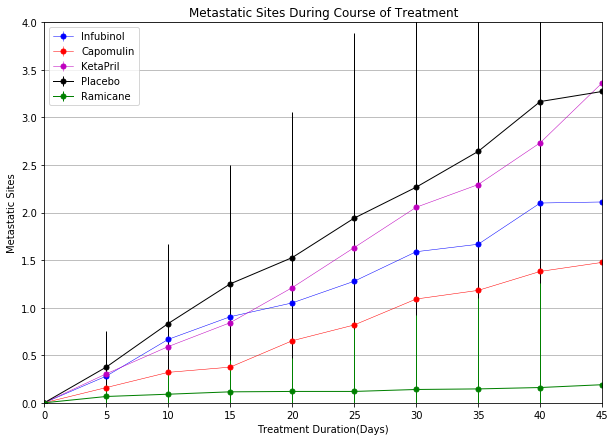

In [11]:
# Generate the Plot (with Error Bars)
fig= plt.figure(figsize=(10,7))

plt.errorbar(met_site_df.index, met_site_df['Infubinol'],yerr=met_site_err_df['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='-', linewidth=0.5,label='Infubinol')

plt.errorbar(met_site_df.index, met_site_df['Capomulin'],yerr=met_site_err_df['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='-', linewidth=0.5,label='Capomulin')

plt.errorbar(met_site_df.index, met_site_df['Ketapril'],yerr=met_site_err_df['Ketapril'],
             color='m', marker='o', markersize=5, linestyle='-', linewidth=0.5,label='KetaPril')

plt.errorbar(met_site_df.index, met_site_df['Placebo'],yerr=met_site_err_df['Placebo'],
             color='k', marker='o', markersize=5, linestyle='-', linewidth=1,label='Placebo')

plt.errorbar(met_site_df.index, met_site_err['Ramicane'],yerr=met_site_err_df['Ramicane'],
             color='g', marker='o', markersize=5, linestyle='-', linewidth=1,label='Ramicane')

# Show the Figure
plt.title("Metastatic Sites During Course of Treatment")
# x label
plt.ylim(0,4)
plt.xlim(0,45)
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Metastatic Sites")
plt.grid(b=True, axis='y', which='major')
plt.legend(loc='upper left')
# Save the Figure
plt.savefig("Metastatic Sites During Course of Treatment")
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count=stan_err=drug_timep_groupby['Mouse ID'].count()
# Convert to DataFrame
mice_count_df=pd.DataFrame(mice_count)
mice_count_df=mice_count_df.rename(columns={"Mouse ID": "Mouse Population"})
mice_count_df=mice_count_df.reset_index()

# Preview DataFrame
mice_count_df

,Drug,Timepoint,Mouse Population
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df=mice_count_df.pivot(index='Timepoint',values='Mouse Population',columns='Drug')
# Preview the Data Frame
mice_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


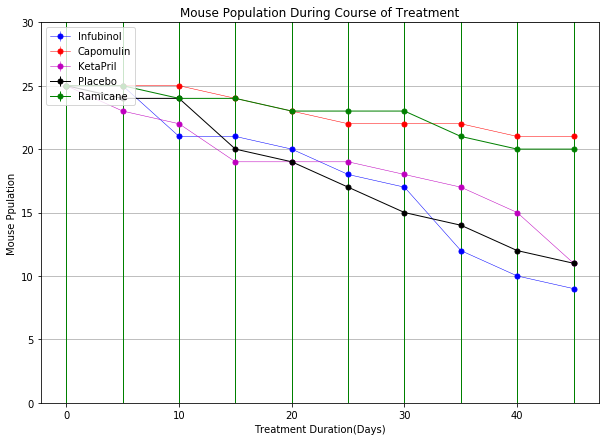

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate the Plot (Accounting for percentages)
fig= plt.figure(figsize=(10,7))

plt.errorbar(mice_count_df.index, mice_count_df['Infubinol'],yerr=mice_count_df['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='-', linewidth=0.5,label='Infubinol')

plt.errorbar(mice_count_df.index, mice_count_df['Capomulin'],yerr=mice_count_df['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='-', linewidth=0.5,label='Capomulin')

plt.errorbar(mice_count_df.index, mice_count_df['Ketapril'],yerr=mice_count_df['Ketapril'],
             color='m', marker='o', markersize=5, linestyle='-', linewidth=0.5,label='KetaPril')

plt.errorbar(mice_count_df.index, mice_count_df['Placebo'],yerr=mice_count_df['Placebo'],
             color='k', marker='o', markersize=5, linestyle='-', linewidth=1,label='Placebo')

plt.errorbar(mice_count_df.index, mice_count_df['Ramicane'],yerr=mice_count_df['Ramicane'],
             color='g', marker='o', markersize=5, linestyle='-', linewidth=1,label='Ramicane')
# Save the Figure

# Show the Figure
plt.title("Mouse Population During Course of Treatment")
#
plt.ylim(0,30)
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Mouse Ppulation")
plt.grid(b=True, axis='y', which='major')
plt.legend(loc='upper left')
plt.show()
# Save the Figure
plt.savefig("Mouse Population During Course of Treatment")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
tumor_change_percen=(drug_tumor_volume.iloc[-1]-drug_tumor_volume.iloc[0])/drug_tumor_volume.iloc[0]*100


tumor_change_percen

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [16]:
# Store all Relevant Percent Changes into a Tuple
perc_change_tuple=tuple(tumor_change_percen)



In [17]:
# Splice the data between passing and failing drugs
'''red will be failing, green will show a success in decreasing tumor sizes'''

colorlist=[]
for x in range(len(tumor_change_percen.keys())):
    if tumor_change_percen.iloc[x] < 0:
        colorlist.append("green")
    else:
        colorlist.append("red")
    

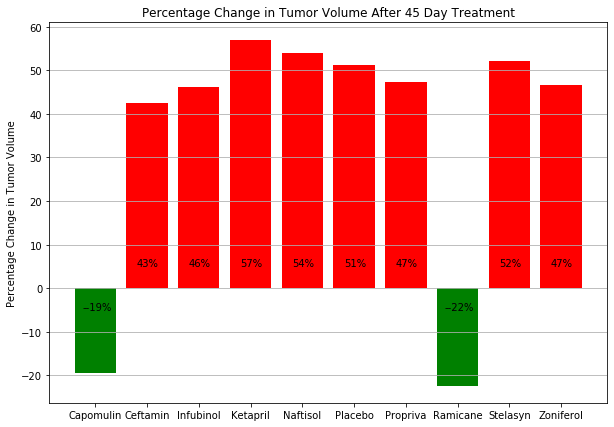

In [18]:
# Orient widths. Add labels, tick marks, etc. 

fig= plt.figure(figsize=(10,7))
plt.yticks(list(range(-40,80,10)))
plt.grid(b=True, axis='y')
xticks = list(range(len(tumor_change_percen)))
bars = plt.bar(xticks, perc_change_tuple, tick_label=list(tumor_change_percen.keys()), color=colorlist)
plt.title("Percentage Change in Tumor Volume After 45 Day Treatment")
plt.ylabel("Percentage Change in Tumor Volume")

# Use functions to label the percentages of changes
def labels(pos, perc):
    text = f"{perc:.0f}%"
    #the .0 gets rid of the decimals to give only whole numbers
    '''making sure positions match the chart'''
    x = pos - 0.2
    y = 5
    if perc < 0:
        x=x-.05
        y = -5
        text = '-' + text
    plt.text(x, y, text, color='black', fontsize=10)

# Call functions to implement the function calls
for i in range(len(tumor_change_percen)):
    labels(i,tumor_change_percen[i])

# Save the Figure
plt.savefig("Percentage Change in Tumor Volume After 45 Day Treatment")
    
# Show the Figure
fig.show()

# Observations

1. Only Capomulin and Ramicane are effective in shrinking tumors.
2. Capomulin and Ramicane treatment have the highest survival rates for mice.
3. Capomulin and Ramicane have the least amounts of metastasis sites at the end of the treatment. 